## Running MobileNetV3 Locally Via PyTorch Weight File

See https://docs.google.com/document/d/1KtrBzb7UgxfEsj7FIIxAIF9_ZcgOLF_LZcjmdI3SghE/edit?usp=sharing for more details on running this

### Import Packages

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import os
import random

### Loading the Model

Model will be loaded from file. If for some reason it isn't there, it will get it from the `torch` package.

In [2]:
model_path = "mobilenet_v3.pth"
model = None
if os.path.exists(model_path): # check if model file exists, else get it from package
    print(f"Loading model from {model_path}")
    model = models.mobilenet_v3_large() 
    model.load_state_dict(torch.load(model_path)) 
else:
    print(f"Model file not found. Downloading pretrained MobileNetV3.")
    model = models.mobilenet_v3_large(pretrained=True)
    torch.save(model.state_dict(), model_path)

model.eval()

Loading model from mobilenet_v3.pth


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

### Load in Test Images

Load test images to perform inference on

In [3]:
image_dir = "../images/"
image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

# randomly select 10 images from dir to perform inference on
selected_images = random.sample(image_paths, 10)

### Perform Processors and Classify

Apply pre-processors to size and adjust the images according to what the model accepts. Perform classifications predictions.

Image: ../images/22990.jpg


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


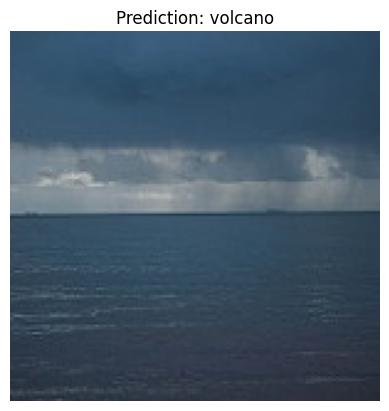

Image: ../images/21798.jpg


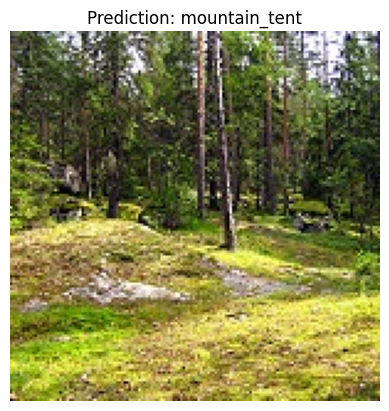

Image: ../images/21012.jpg


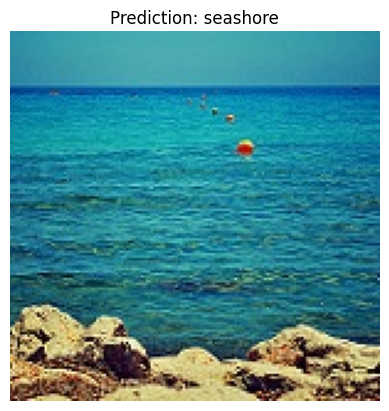

Image: ../images/21670.jpg


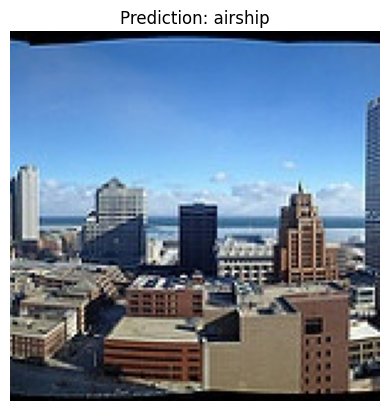

Image: ../images/22406.jpg


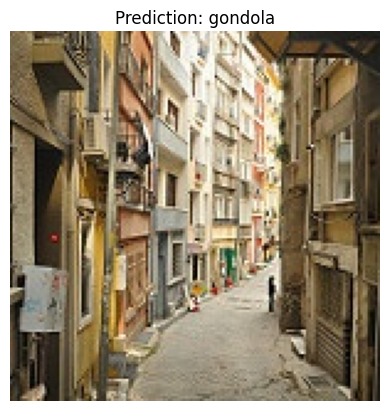

Image: ../images/20991.jpg


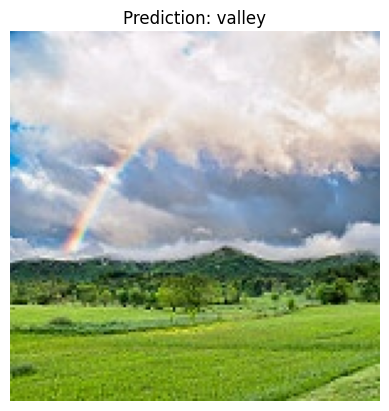

Image: ../images/24239.jpg


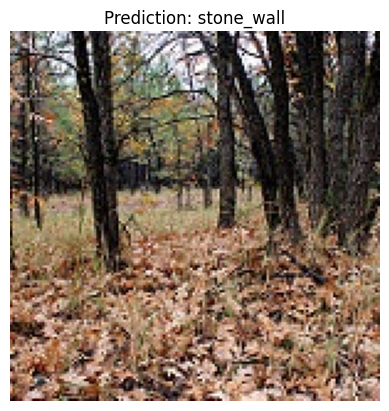

Image: ../images/20546.jpg


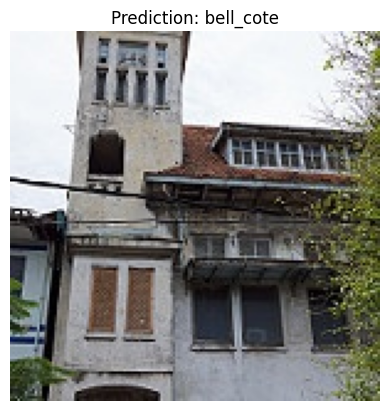

Image: ../images/22833.jpg


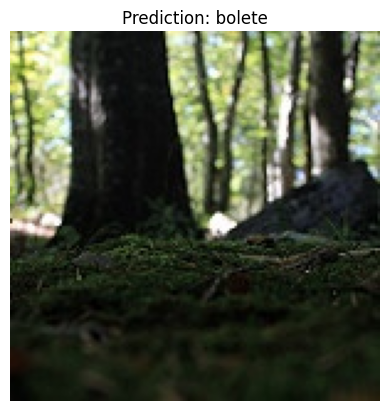

Image: ../images/22924.jpg


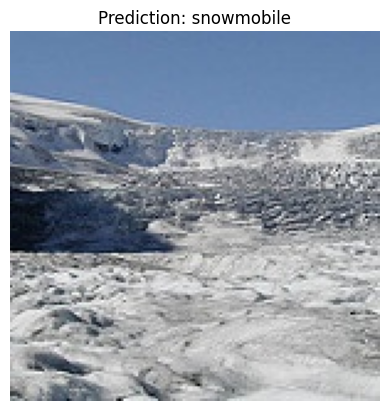

In [4]:
# perform pre-processing on image so model can inference on it
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize image to 256px
    transforms.CenterCrop(224),  # Crop to 224x224px
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# get dictionary of all classes that mobilenet will predict from
# i.e all possible options for what class an image could be, choosing from 1,000 options
local_class_idx_path = "imagenet_class_index.json"  
with open(local_class_idx_path, 'r') as f:
    class_idx = json.load(f)

for image_path in selected_images:
    image = Image.open(image_path)
    input_tensor = preprocess(image).unsqueeze(0)  # Add a batch dimension

    with torch.no_grad():  # Disable gradient computation
        output = model(input_tensor)
    
    # Get the predicted class index
    _, predicted_class = torch.max(output, 1)
    predicted_class_name = class_idx[str(predicted_class.item())][1]
    
    # Display the image and predicted class
    print(f"Image: {image_path}")
    plt.imshow(image)
    plt.title(f"Prediction: {predicted_class_name}")
    plt.axis('off')  # Hide axes
    plt.show()